<a href="https://colab.research.google.com/github/Ilieska/VNP/blob/main/VNP_PROEKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GDELT Preparation Data

In [51]:
import pandas as pd
import numpy as np
import csv
from google.colab import drive
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/VNP-PROEKT/20150218230000.export.CSV',header=None, sep='\t')

In [4]:
data.columns = [
    'GlobalEventID', 'Day', 'MonthYear', 'Year', 'FractionDate', 'Actor1Code',
    'Actor1Name', 'Country Code', 'Actor1KnownGroupCode', 'Actor1EthnicCode',
    'Actor1Religion1Code', 'Actor1Religion2Code', 'Actor1Type1Code', 'Actor1Type2Code',
    'Actor1Type3Code', 'Actor2Code', 'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
    'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code', 'Actor2Type1Code',
    'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent', 'EventCode', 'EventBaseCode',
    'EventRootCode', 'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources', 'NumArticles',
    'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName', 'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code',
    'Actor1Geo_ADM2Code', 'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID',
    'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode', 'Actor2Geo_ADM1Code',
    'Actor2Geo_ADM2Code', 'Actor2Geo_Lat', 'Actor2Geo_Long', 'Actor2Geo_FeatureID',
    'ActionGeo_Type', 'ActionGeo_FullName', 'ActionGeo_CountryCode', 'ActionGeo_ADM1Code',
    'ActionGeo_ADM2Code', 'ActionGeo_Lat', 'ActionGeo_Long', 'ActionGeo_FeatureID',
    'DATEADDED', 'SOURCEURL'
]

In [5]:
data.head(10)

,GlobalEventID,Day,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Country Code,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,410412347,20140218,201402,2014,2014.1315,NaN,NaN,NaN,NaN,NaN,...,4,"Waterkloof, Free State, South Africa",SF,SF03,77359,-30.3098,25.2971,-1299321,20150218230000,http://www.dailymaverick.co.za/article/2015-02...
1,410412348,20140218,201402,2014,2014.1315,NaN,NaN,NaN,NaN,NaN,...,4,"Bengaluru, Karnataka, India",IN,IN19,70159,12.9833,77.5833,-2090174,20150218230000,http://timesofindia.indiatimes.com/city/bengal...
2,410412349,20140218,201402,2014,2014.1315,NaN,NaN,NaN,NaN,NaN,...,4,"Great Southern, Victoria, Australia",AS,AS07,5387,-36.0667,146.4830,-1576477,20150218230000,http://www.voxy.co.nz/entertainment/coast-new-...
3,410412350,20140218,201402,2014,2014.1315,NaN,NaN,NaN,NaN,NaN,...,1,New Zealand,NZ,NZ,NaN,-41.0000,174.0000,NZ,20150218230000,http://www.voxy.co.nz/entertainment/coast-new-...
4,410412351,20140218,201402,2014,2014.1315,NaN,NaN,NaN,NaN,NaN,...,2,"Idaho, United States",US,USID,NaN,44.2394,-114.5100,ID,20150218230000,http://www.eastidahonews.com/2015/02/neil-patr...
5,410412352,20140218,201402,2014,2014.1315,AUS,AUSTRALIA,AUS,NaN,NaN,...,4,"Brisbane, Queensland, Australia",AS,AS04,154654,-27.5000,153.0170,-1561728,20150218230000,http://www.businessspectator.com.au/article/20...
6,410412353,20140218,201402,2014,2014.1315,AUS,AUSTRALIAN,AUS,NaN,NaN,...,4,"Great Southern, Victoria, Australia",AS,AS07,5387,-36.0667,146.4830,-1576477,20150218230000,http://www.voxy.co.nz/entertainment/coast-new-...
7,410412354,20140218,201402,2014,2014.1315,AUS,AUSTRALIA,AUS,NaN,NaN,...,1,New Zealand,NZ,NZ,NaN,-41.0000,174.0000,NZ,20150218230000,http://www.voxy.co.nz/entertainment/coast-new-...
8,410412355,20140218,201402,2014,2014.1315,AUS,AUSTRALIA,AUS,NaN,NaN,...,4,"Great Southern, Victoria, Australia",AS,AS07,5387,-36.0667,146.4830,-1576477,20150218230000,http://www.voxy.co.nz/entertainment/coast-new-...
9,410412356,20140218,201402,2014,2014.1315,AUS,AUSTRALIAN,AUS,NaN,NaN,...,1,New Zealand,NZ,NZ,NaN,-41.0000,174.0000,NZ,20150218230000,http://www.voxy.co.nz/entertainment/coast-new-...


In [6]:
def convert_date(date_int):
    date_str = str(date_int)
    date_obj = datetime.strptime(date_str, "%Y%m%d")
    return date_obj.strftime("%Y-%m-%d")

In [7]:
data['Date'] = data['Day'].apply(convert_date)

In [8]:
data['Date']

,Date
0,2014-02-18
1,2014-02-18
2,2014-02-18
3,2014-02-18
4,2014-02-18
...,...
2266,2015-02-18
2267,2015-02-18
2268,2015-02-18
2269,2015-02-18


In [9]:
data = data.drop(columns=['Day','MonthYear', 'Year', 'FractionDate','Actor1KnownGroupCode', 'Actor1EthnicCode',
    'Actor1Religion1Code', 'Actor1Religion2Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2KnownGroupCode',
    'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code', 'Actor2Type1Code','Actor2Type2Code', 'Actor2Type3Code',
    'Actor1Geo_ADM1Code','Actor1Geo_ADM2Code', 'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID',
    'Actor2Geo_ADM1Code','Actor2Geo_ADM2Code', 'Actor2Geo_Lat', 'Actor2Geo_Long', 'Actor2Geo_FeatureID',
    'ActionGeo_ADM1Code','ActionGeo_ADM2Code', 'ActionGeo_Lat', 'ActionGeo_Long', 'ActionGeo_FeatureID',
    'ActionGeo_Type', 'ActionGeo_FullName', 'ActionGeo_CountryCode','EventBaseCode', 'EventRootCode','SOURCEURL',
    'DATEADDED'])

In [10]:
data.head(50)

,GlobalEventID,Actor1Code,Actor1Name,Country Code,Actor1Type1Code,Actor2Code,Actor2Name,Actor2CountryCode,IsRootEvent,EventCode,...,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Date
0,410412347,NaN,NaN,NaN,NaN,GOV,PRESIDENT,NaN,0,43,...,1,5,-4.477612,0,NaN,NaN,4,"Waterkloof, Free State, South Africa",SF,2014-02-18
1,410412348,NaN,NaN,NaN,NaN,IND,MUMBAI,IND,1,42,...,1,5,2.078522,0,NaN,NaN,4,"Mumbai, Maharashtra, India",IN,2014-02-18
2,410412349,NaN,NaN,NaN,NaN,NZL,KIWI,NZL,1,42,...,1,1,7.517084,0,NaN,NaN,1,New Zealand,NZ,2014-02-18
3,410412350,NaN,NaN,NaN,NaN,NZL,KIWI,NZL,1,42,...,1,2,7.517084,0,NaN,NaN,1,New Zealand,NZ,2014-02-18
4,410412351,NaN,NaN,NaN,NaN,USA,LOS ANGELES,USA,1,42,...,1,10,0.000000,0,NaN,NaN,2,"Idaho, United States",US,2014-02-18
5,410412352,AUS,AUSTRALIA,AUS,NaN,BUS,INVESTOR,NaN,1,13,...,1,2,-1.263823,4,"Brisbane, Queensland, Australia",AS,4,"Brisbane, Queensland, Australia",AS,2014-02-18
6,410412353,AUS,AUSTRALIAN,AUS,NaN,NZL,NEW ZEALAND,NZL,1,42,...,1,1,7.517084,4,"Great Southern, Victoria, Australia",AS,1,New Zealand,NZ,2014-02-18
7,410412354,AUS,AUSTRALIA,AUS,NaN,NZL,KIWI,NZL,1,42,...,1,1,7.517084,4,"Great Southern, Victoria, Australia",AS,1,New Zealand,NZ,2014-02-18
8,410412355,AUS,AUSTRALIA,AUS,NaN,NZL,KIWI,NZL,1,42,...,1,1,7.517084,1,New Zealand,NZ,4,"Great Southern, Victoria, Australia",AS,2014-02-18
9,410412356,AUS,AUSTRALIAN,AUS,NaN,NZL,NEW ZEALAND,NZL,1,42,...,1,1,7.517084,1,New Zealand,NZ,1,New Zealand,NZ,2014-02-18


In [11]:
data.columns

Index(['GlobalEventID', 'Actor1Code', 'Actor1Name', 'Country Code',
       'Actor1Type1Code', 'Actor2Code', 'Actor2Name', 'Actor2CountryCode',
       'IsRootEvent', 'EventCode', 'QuadClass', 'GoldsteinScale',
       'NumMentions', 'NumSources', 'NumArticles', 'AvgTone', 'Actor1Geo_Type',
       'Actor1Geo_FullName', 'Actor1Geo_CountryCode', 'Actor2Geo_Type',
       'Actor2Geo_FullName', 'Actor2Geo_CountryCode', 'Date'],
      dtype='object')

## `Missing values`

In [12]:
data.isna().sum()

,0
GlobalEventID,0
Actor1Code,193
Actor1Name,193
Country Code,978
Actor1Type1Code,1326
Actor2Code,557
Actor2Name,557
Actor2CountryCode,1177
IsRootEvent,0
EventCode,0


In [13]:
columns_to_drop_missing = ['Actor1Code', 'Actor1Name', 'Country Code', 'Actor1Type1Code', 'Actor2Code', 'Actor2Name', 'Actor2CountryCode','Actor1Geo_FullName', 'Actor1Geo_CountryCode','Actor2Geo_FullName', 'Actor2Geo_CountryCode']

In [14]:
data = data.dropna(subset=columns_to_drop_missing)

In [15]:
data.isna().sum()

,0
GlobalEventID,0
Actor1Code,0
Actor1Name,0
Country Code,0
Actor1Type1Code,0
Actor2Code,0
Actor2Name,0
Actor2CountryCode,0
IsRootEvent,0
EventCode,0


## Аnalysis

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 30 to 2258
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GlobalEventID          96 non-null     int64  
 1   Actor1Code             96 non-null     object 
 2   Actor1Name             96 non-null     object 
 3   Country Code           96 non-null     object 
 4   Actor1Type1Code        96 non-null     object 
 5   Actor2Code             96 non-null     object 
 6   Actor2Name             96 non-null     object 
 7   Actor2CountryCode      96 non-null     object 
 8   IsRootEvent            96 non-null     int64  
 9   EventCode              96 non-null     int64  
 10  QuadClass              96 non-null     int64  
 11  GoldsteinScale         96 non-null     float64
 12  NumMentions            96 non-null     int64  
 13  NumSources             96 non-null     int64  
 14  NumArticles            96 non-null     int64  
 15  AvgTone   

In [17]:
data.describe()

,GlobalEventID,IsRootEvent,EventCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor2Geo_Type
count,9.600000e+01,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000
mean,4.104139e+08,0.697917,153.385417,2.020833,-0.068750,6.416667,1.333333,6.31250,-2.660107,2.468750,2.531250
std,7.352115e+02,0.461571,293.981395,1.239517,5.044691,11.526324,1.303168,11.44719,3.755423,1.222191,1.222191
min,4.104124e+08,0.000000,10.000000,1.000000,-10.000000,1.000000,1.000000,1.00000,-16.326531,1.000000,1.000000
25%,4.104134e+08,0.000000,24.500000,1.000000,-4.250000,2.000000,1.000000,2.00000,-4.701780,1.000000,1.000000
50%,4.104140e+08,1.000000,51.000000,1.000000,0.400000,3.500000,1.000000,3.50000,-2.066116,2.000000,2.000000
75%,4.104145e+08,1.000000,172.000000,3.000000,3.400000,6.000000,1.000000,6.00000,0.000000,4.000000,4.000000
max,4.104146e+08,1.000000,1821.000000,4.000000,7.400000,104.000000,10.000000,104.00000,4.054054,4.000000,4.000000


array([[<Axes: title={'center': 'GlobalEventID'}>,
        <Axes: title={'center': 'IsRootEvent'}>,
        <Axes: title={'center': 'EventCode'}>],
       [<Axes: title={'center': 'QuadClass'}>,
        <Axes: title={'center': 'GoldsteinScale'}>,
        <Axes: title={'center': 'NumMentions'}>],
       [<Axes: title={'center': 'NumSources'}>,
        <Axes: title={'center': 'NumArticles'}>,
        <Axes: title={'center': 'AvgTone'}>],
       [<Axes: title={'center': 'Actor1Geo_Type'}>,
        <Axes: title={'center': 'Actor2Geo_Type'}>, <Axes: >]],
      dtype=object)

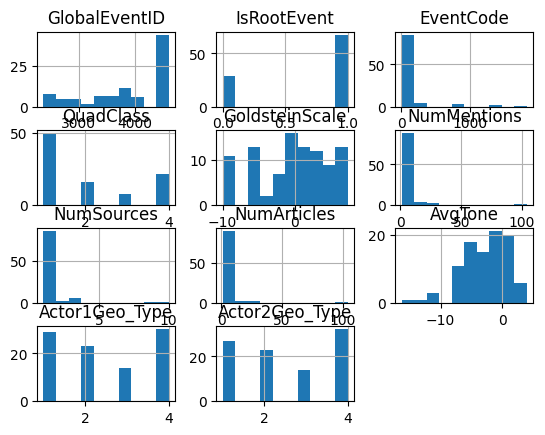

In [18]:
data.hist()

In [19]:
data

,GlobalEventID,Actor1Code,Actor1Name,Country Code,Actor1Type1Code,Actor2Code,Actor2Name,Actor2CountryCode,IsRootEvent,EventCode,...,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Date
30,410412377,MNCUSAMED,GOOGLE,USA,MNC,EUR,EUROPE,EUR,1,71,...,1,10,0.000000,1,Japan,JA,4,"London, London, City of, United Kingdom",UK,2014-02-18
48,410412395,USAGOV,OBAMA,USA,GOV,USA,UNITED STATES,USA,1,20,...,1,4,-2.072539,2,"Idaho, United States",US,2,"Idaho, United States",US,2014-02-18
49,410412396,USAMIL,AMERICAN TROOPS,USA,MIL,IRQ,IRAQ,IRQ,0,42,...,3,4,-1.110038,3,"Chicago, Illinois, United States",US,1,Iraq,IZ,2014-02-18
60,410412407,ISRJUD,ISRAELI,ISR,JUD,ISR,ISRAEL,ISR,0,120,...,1,3,-4.584527,4,"Jerusalem, Israel (general), Israel",IS,4,"Jerusalem, Israel (general), Israel",IS,2015-01-19
89,410412436,NGACVL,NIGERIA,NGA,CVL,NER,NIGER,NER,1,195,...,1,1,-4.377104,1,Benin,BN,1,Benin,BN,2015-02-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,410414576,USAMED,REUTERS,USA,MED,USA,UNITED STATES,USA,1,20,...,1,2,-10.493827,3,"White House, District of Columbia, United States",US,1,Syria,SY,2015-02-18
2230,410414577,USAMED,THE ASSOCIATED PRESS,USA,MED,USA,UNITED STATES,USA,1,831,...,1,2,0.000000,3,"Portland State University, Oregon, United States",US,3,"Portland State University, Oregon, United States",US,2015-02-18
2231,410414578,USAMED,THE ASSOCIATED PRESS,USA,MED,USA,UNITED STATES,USA,1,831,...,1,2,-2.397260,3,"Dallas, Texas, United States",US,3,"Portland State University, Oregon, United States",US,2015-02-18
2232,410414579,USAMED,THE ASSOCIATED PRESS,USA,MED,USA,UNITED STATES,USA,1,831,...,1,2,-2.310231,2,"Texas, United States",US,3,"Portland State University, Oregon, United States",US,2015-02-18


In [20]:
print(data.columns)

Index(['GlobalEventID', 'Actor1Code', 'Actor1Name', 'Country Code',
       'Actor1Type1Code', 'Actor2Code', 'Actor2Name', 'Actor2CountryCode',
       'IsRootEvent', 'EventCode', 'QuadClass', 'GoldsteinScale',
       'NumMentions', 'NumSources', 'NumArticles', 'AvgTone', 'Actor1Geo_Type',
       'Actor1Geo_FullName', 'Actor1Geo_CountryCode', 'Actor2Geo_Type',
       'Actor2Geo_FullName', 'Actor2Geo_CountryCode', 'Date'],
      dtype='object')


In [21]:
required_columns =  ['Year', 'Actor1CountryCode', 'Actor2CountryCode', 'EventCode', 'GoldsteinScale', 'AvgTone']

## IMF Preparation Data

In [22]:
data1 = pd.read_csv('/content/drive/MyDrive/VNP-PROEKT/BOPAGG_07-04-2024 03-47-48-62_timeSeries.csv',delimiter=',', header=None)

In [23]:
data1.columns = [
    'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Attribute',
    '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
    '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '/'
]

In [24]:
data1.isna().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
Attribute,0
2005,2220
2006,1978
2007,1724
2008,1526
2009,1316


In [25]:
data1 = data1.drop(columns=['/'], errors='ignore')

In [26]:
data1 = data1.iloc[1::2].reset_index(drop=True)

In [27]:
columns_to_drop_missing1 = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [28]:
data1 = data1.dropna(subset=columns_to_drop_missing1)

In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5184 entries, 1 to 7413
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    5184 non-null   object
 1   Country Code    5184 non-null   object
 2   Indicator Name  5184 non-null   object
 3   Indicator Code  5184 non-null   object
 4   Attribute       5184 non-null   object
 5   2005            5184 non-null   object
 6   2006            5184 non-null   object
 7   2007            5184 non-null   object
 8   2008            5184 non-null   object
 9   2009            5184 non-null   object
 10  2010            5184 non-null   object
 11  2011            5184 non-null   object
 12  2012            5184 non-null   object
 13  2013            5184 non-null   object
 14  2014            5184 non-null   object
 15  2015            5184 non-null   object
 16  2016            5184 non-null   object
 17  2017            5184 non-null   object
 18  2018         

In [30]:
data1.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,"Tajikistan, Rep. of",923,"Current Account, Goods and Services, Services,...",BXS_BP6_USD,Value,146341800,134214700,148692100,181409000,178870800,...,363379359,309501017,252390533,231825040,252000520,242220760,242358300,138533310,146816690,137357700
2,Thailand,578,"Current Account, Goods and Services, Services,...",BXS_BP6_USD,Value,19925420000,24611780000,30113900000,33124720000,30204226733.264,...,54804079249.3234,51940180537.1075,58082146243.2163,63786404938.5578,70964140350.4996,77473628712.6413,81177527678.5019,30997168591.504,25407369360.878,38900970353.1383
3,St. Kitts and Nevis,361,"Capital Account, Total, Debit, US Dollars",BK_DB_BP6_USD,Value,0,0,0,0,0,...,0,5027.03703703704,0,0,0,0,0,0,0,0
4,Sweden,144,"Capital Account, Total, Debit, US Dollars",BK_DB_BP6_USD,Value,229254224.517409,3026918480.87301,1362051665.37728,1231752052.17625,1271832584.71187,...,1833891691.49177,1245584489.09991,1435226132.35552,823046896.711224,836095916.059075,499732561.023863,760347984.91971,515150554.654031,1067370229.37672,872741756.133573
6,Ghana,652,"Current Account, Secondary income, Net, US Dol...",BIS_BP6_USD,Value,1794219000,2248262000,2043178000,2211496000,2077990000,...,1939440000,2008459448.43818,2597725974.44849,1456624516.75657,2424200000,2583021547.21787,3404082222.55026,3732878087.25469,3354921866.81031,3572939401.51735
8,Kyrgyz Rep.,917,"Current Account, Goods and Services, Goods, Cr...",BXG_BP6_USD,Value,686837029.761812,905995141.755812,1337838494.76181,1874366597.76181,1693835674.76181,...,2757121226.91884,2380088035.43499,1571439692.28565,1572558202.72608,1749280009.9715,1904511151.21524,2025040704.28396,2007177693.38534,2770064333.06867,2253345533.09391
9,Anguilla,312,"Capital Account, Total, Credit, US Dollars",BK_CD_BP6_USD,Value,1636333.33333333,5477022.22222222,0,3401966.66666667,0,...,5823485.18518518,1211183.69259259,1385371.02222222,867225.496296296,11330958.2703704,12674074.0740741,0,3611497.57407407,896929.118518519,1851851.85185185
10,Georgia,915,"Capital Account, Total, Credit, US Dollars",BK_CD_BP6_USD,Value,56478213.39,155092463.88,83395806.03,106620766.22,177606451.33,...,132544509.74,106183060.34,58332699.3,55975071.2,83053132.56,76057770.56,47050041.99,41052787.77,38221147.24,40893742.92
12,Greece,174,"Financial account, Portfolio investment, Net i...",BFPL_BP6_USD,Value,32297882628.8333,18742484719.0454,45542672854.1319,24934519833.0692,43189000174.3853,...,-10034865322.1837,3013978228.28169,-1572330710.41537,-2870393161.11616,918016157.033759,1804823918.64478,2031121743.29531,-14614604693.4597,4221702182.69981,1652421612.51467
13,Guatemala,258,"Financial account, Portfolio investment, Net i...",BFPL_BP6_USD,Value,-37000000,-23600000,-201600000,33800000,-12300000,...,727746680,790239900,21960660,618927600,797939900,-124267800,686026730,323226140,1725254010,542008470


In [31]:
data1.describe()

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184,...,5184,5184,5184,5184,5184,5184,5184,5184,5184,5184
unique,159,159,46,46,1,4914,4933,4944,4964,4969,...,4997,5018,5019,5019,5030,5039,5036,5042,5030,5031
top,All Countries,010,"Current Account, Goods and Services, Services,...",BXS_BP6_USD,Value,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,45,45,159,159,5184,191,166,155,143,133,...,112,93,91,90,85,78,81,78,85,87



## WORLD BANK DATA

In [32]:
data3 = pd.read_csv('/content/drive/MyDrive/VNP-PROEKT/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_591828n.csv', sep=',"', header=0, quotechar='"')
data3

<ipython-input-32-b0c023668df4>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data3 = pd.read_csv('/content/drive/MyDrive/VNP-PROEKT/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_591828n.csv', sep=',"', header=0, quotechar='"')


,"""Country Name""""","""Country Code""""","""Indicator Name""""","""Indicator Code""""","""1960""""","""1961""""","""1962""""","""1963""""","""1964""""","""1965""""",...,"""2015""""","""2016""""","""2017""""","""2018""""","""2019""""","""2020""""","""2021""""","""2022""""","""2023""""",Unnamed: 68
0,"""Aruba","""ABW""""","""GDP (current US$)""""","""NY.GDP.MKTP.CD""""","""""""","""""""","""""""","""""""","""""""","""""""",...,"""2962907262.56983""""","""2983635195.53073""""","""3092429050.27933""""","""3276184357.5419""""","""3395798882.68156""""","""2558906303.88098""""","""3103184101.51354""""","""3544707788.05664""""","""""""",NaN
1,"""Africa Eastern and Southern","""AFE""""","""GDP (current US$)""""","""NY.GDP.MKTP.CD""""","""21216962289.5576""""","""22307471355.6779""""","""23702472100.0023""""","""25779376632.7218""""","""28049537324.8574""""","""30374910059.5078""""",...,"""899295676086.836""""","""829829959319.292""""","""940105480733.676""""","""1012719339457.72""""","""1006527294483.09""""","""929074086484.093""""","""1086772164579.87""""","""1183962133998.87""""","""1236163044999.97""""",NaN
2,"""Afghanistan","""AFG""""","""GDP (current US$)""""","""NY.GDP.MKTP.CD""""","""""""","""""""","""""""","""""""","""""""","""""""",...,"""19134221644.7325""""","""18116572395.0772""""","""18753456497.8159""""","""18053222687.4126""""","""18799444490.1128""""","""19955929052.1496""""","""14266499429.8746""""","""14502158192.0904""""","""""""",NaN
3,"""Africa Western and Central","""AFW""""","""GDP (current US$)""""","""NY.GDP.MKTP.CD""""","""11884128412.3564""""","""12685662254.5483""""","""13606829296.9535""""","""14439975113.7629""""","""15769107619.6443""""","""16934480009.6751""""",...,"""769367317617.821""""","""692181085843.488""""","""685750159763.133""""","""768189587833.624""""","""823933630796.516""""","""787146719022.421""""","""845993047006.805""""","""877140805320.357""""","""796586157553.094""""",NaN
4,"""Angola","""AGO""""","""GDP (current US$)""""","""NY.GDP.MKTP.CD""""","""""""","""""""","""""""","""""""","""""""","""""""",...,"""90496420506.5957""""","""52761617225.9253""""","""73690154990.7312""""","""79450688259.3664""""","""70897962732.0277""""","""48501561203.5686""""","""66505129987.7235""""","""104399746853.401""""","""84722957642.3757""""",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"""Kosovo","""XKX""""","""GDP (current US$)""""","""NY.GDP.MKTP.CD""""","""""""","""""""","""""""","""""""","""""""","""""""",...,"""6295848422.71573""""","""6682677289.98994""""","""7180764703.35718""""","""7878759714.82322""""","""7899737577.47286""""","""7717145217.81247""""","""9413403724.01899""""","""9354903061.8898""""","""10438351483.1677""""",NaN
262,"""Yemen, Rep.","""YEM""""","""GDP (current US$)""""","""NY.GDP.MKTP.CD""""","""""""","""""""","""""""","""""""","""""""","""""""",...,"""42444490073.8555""""","""31317825274.1507""""","""26842229044.5848""""","""21606160663.0318""""","""""""","""""""","""""""","""""""","""""""",NaN
263,"""South Africa","""ZAF""""","""GDP (current US$)""""","""NY.GDP.MKTP.CD""""","""8748596500.5614""""","""9225996309.60148""""","""9813996074.40157""""","""10854195658.3217""""","""11955995217.6019""""","""13068994772.4021""""",...,"""346709790458.563""""","""323585509674.481""""","""381448814653.456""""","""405260723892.517""""","""389330032224.269""""","""338291396026.698""""","""420117812466.041""""","""405270850098.738""""","""377781600985.873""""",NaN
264,"""Zambia","""ZMB""""","""GDP (current US$)""""","""NY.GDP.MKTP.CD""""","""713000000""""","""696285714.285714""""","""693142857.142857""""","""718714285.714286""""","""839428571.428571""""","""1082857142.85714""""",...,"""21251216798.7762""""","""20958412538.3093""""","""25873601260.8353""""","""26311507273.6735""""","""23308667781.2258""""","""18137764931.2808""""","""22096416932.0089""""","""29163782140.4858""""","""28162630953.9285""""",NaN


In [33]:
data3 = data3.replace('"', '', regex=True)
data3 = data3.replace(r'^\s*$', np.nan, regex=True)


In [34]:
data3 = data3.drop(data3.columns[3:49], axis=1)
data3

,"""Country Name""""","""Country Code""""","""Indicator Name""""","""2005""""","""2006""""","""2007""""","""2008""""","""2009""""","""2010""""","""2011""""",...,"""2015""""","""2016""""","""2017""""","""2018""""","""2019""""","""2020""""","""2021""""","""2022""""","""2023""""",Unnamed: 68
0,Aruba,ABW,GDP (current US$),2360017318.43575,2469782681.56425,2677641340.78212,2843024581.00559,2553793296.08939,2453597206.70391,2637859217.87709,...,2962907262.56983,2983635195.53073,3092429050.27933,3276184357.5419,3395798882.68156,2558906303.88098,3103184101.51354,3544707788.05664,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),516661066465.534,580240749509.224,665598701583.95,713502105052.171,715485327250.406,849409658737.661,945439147816.613,...,899295676086.836,829829959319.292,940105480733.676,1012719339457.72,1006527294483.09,929074086484.093,1086772164579.87,1183962133998.87,1236163044999.97,NaN
2,Afghanistan,AFG,GDP (current US$),6203256538.70967,6971758282.29351,9747886187.39393,10109297047.5432,12416152732.0567,15856668555.8336,17805098206.3141,...,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),312409315139.612,397088785487.807,465683513908.341,567937963599.451,508552578501.962,598697706331.002,682233324561.043,...,769367317617.821,692181085843.488,685750159763.133,768189587833.624,823933630796.516,787146719022.421,845993047006.805,877140805320.357,796586157553.094,NaN
4,Angola,AGO,GDP (current US$),36970900883.8109,52381025141.4268,65266415494.2584,88538665084.8634,70307196181.6539,83799474069.7315,111789747670.59,...,90496420506.5957,52761617225.9253,73690154990.7312,79450688259.3664,70897962732.0277,48501561203.5686,66505129987.7235,104399746853.401,84722957642.3757,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NaN,NaN,NaN,5181776768.71247,5015894692.97027,5343950556.07185,6341613609.97976,...,6295848422.71573,6682677289.98994,7180764703.35718,7878759714.82322,7899737577.47286,7717145217.81247,9413403724.01899,9354903061.8898,10438351483.1677,NaN
262,"Yemen, Rep.",YEM,GDP (current US$),16731566717.1888,19063143369.858,21650528674.0933,26910855807.288,25130278212.5575,30906749533.221,32726417878.391,...,42444490073.8555,31317825274.1507,26842229044.5848,21606160663.0318,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),288867217196.534,303858675363.643,333077117253.684,316131258616.309,329754060647.129,417363822801.713,458199494830.834,...,346709790458.563,323585509674.481,381448814653.456,405260723892.517,389330032224.269,338291396026.698,420117812466.041,405270850098.738,377781600985.873,NaN
264,Zambia,ZMB,GDP (current US$),8331870169.14977,12756858899.2812,14056957976.2648,17910858637.9048,15328342303.9575,20265559483.8548,23459515275.5776,...,21251216798.7762,20958412538.3093,25873601260.8353,26311507273.6735,23308667781.2258,18137764931.2808,22096416932.0089,29163782140.4858,28162630953.9285,NaN


In [35]:
data3.columns

Index(['"Country Name""', '"Country Code""', '"Indicator Name""', '"2005""',
       '"2006""', '"2007""', '"2008""', '"2009""', '"2010""', '"2011""',
       '"2012""', '"2013""', '"2014""', '"2015""', '"2016""', '"2017""',
       '"2018""', '"2019""', '"2020""', '"2021""', '"2022""', '"2023""',
       'Unnamed: 68'],
      dtype='object')

In [36]:
data3.columns = [
    'Country Name', 'Country Code', 'Indicator Name',
    'Indicator Code','2005','2006', '2007', '2008',
    '2009', '2010', '2011','2012', '2013', '2014', '2015', '2016', '2017',
    '2018', '2019', '2020', '2021', '2022', '2023',
]

In [37]:
data3 = data3.drop(columns=['2023'])


In [38]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    266 non-null    object
 1   Country Code    266 non-null    object
 2   Indicator Name  266 non-null    object
 3   Indicator Code  256 non-null    object
 4   2005            257 non-null    object
 5   2006            257 non-null    object
 6   2007            258 non-null    object
 7   2008            258 non-null    object
 8   2009            258 non-null    object
 9   2010            261 non-null    object
 10  2011            259 non-null    object
 11  2012            259 non-null    object
 12  2013            260 non-null    object
 13  2014            258 non-null    object
 14  2015            258 non-null    object
 15  2016            258 non-null    object
 16  2017            258 non-null    object
 17  2018            258 non-null    object
 18  2019      

In [39]:
data3.isna().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,10
2005,9
2006,9
2007,8
2008,8
2009,8
2010,5


In [40]:
columns_to_drop_missing3 = ['2005','2006', '2007', '2008',
    '2009', '2010', '2011','2012', '2013', '2014', '2015', '2016', '2017',
    '2018', '2019', '2020', '2021', '2022',]

In [41]:
data3 = data3.dropna(subset=columns_to_drop_missing3)

In [42]:
data3.isna().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
2005,0
2006,0
2007,0
2008,0
2009,0
2010,0


# FInal Dataset

In [43]:
merged_data = pd.merge(data, data1, on='Country Code', how='outer')
final_merged_df = pd.merge(merged_data, data3, on='Country Code', how='outer')

In [44]:
merged_data

,GlobalEventID,Actor1Code,Actor1Name,Country Code,Actor1Type1Code,Actor2Code,Actor2Name,Actor2CountryCode,IsRootEvent,EventCode,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,410412377.0,MNCUSAMED,GOOGLE,USA,MNC,EUR,EUROPE,EUR,1.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410412395.0,USAGOV,OBAMA,USA,GOV,USA,UNITED STATES,USA,1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,410412396.0,USAMIL,AMERICAN TROOPS,USA,MIL,IRQ,IRAQ,IRQ,0.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,410412441.0,USAJUD,ORLANDO,USA,JUD,USA,TEXAS,USA,0.0,172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,410413806.0,MNCUSA,COSTCO,USA,MNC,ESP,SPAIN,ESP,0.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,NaN,NaN,NaN,927,NaN,NaN,NaN,NaN,NaN,NaN,...,13962042682.9477,13514094325.9935,11575963790.8547,11037273348.3514,12377319711.515,18252445318.979,21189951960.7129,19048314708.6048,22908690100.0188,28309158259.2387
5276,NaN,NaN,NaN,927,NaN,NaN,NaN,NaN,NaN,NaN,...,17030165525.7342,19637136220.6802,18979044936.4843,21367073857.8137,22616107595.2052,22070785307.4346,19793272352.0292,20279947192.4467,16818646587.9532,18951142148.3141
5277,NaN,NaN,NaN,927,NaN,NaN,NaN,NaN,NaN,NaN,...,1752936514.1882,1623836419.24983,2025214696.46395,2210414205.4335,2597539363.5465,3205168279.40567,2957254347.54308,1938906678.6052,2554032264.1158,4211338002.93652
5278,NaN,NaN,NaN,927,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [45]:
final_merged_df

,GlobalEventID,Actor1Code,Actor1Name,Country Code,Actor1Type1Code,Actor2Code,Actor2Name,Actor2CountryCode,IsRootEvent,EventCode,...,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y
0,410412377.0,MNCUSAMED,GOOGLE,USA,MNC,EUR,EUROPE,EUR,1.0,71.0,...,17608138000000,18295019000000,18804913000000,19612102000000,20656516000000,21521395000000,21322950000000,23594031000000,25744108000000,27360935000000
1,410412395.0,USAGOV,OBAMA,USA,GOV,USA,UNITED STATES,USA,1.0,20.0,...,17608138000000,18295019000000,18804913000000,19612102000000,20656516000000,21521395000000,21322950000000,23594031000000,25744108000000,27360935000000
2,410412396.0,USAMIL,AMERICAN TROOPS,USA,MIL,IRQ,IRAQ,IRQ,0.0,42.0,...,17608138000000,18295019000000,18804913000000,19612102000000,20656516000000,21521395000000,21322950000000,23594031000000,25744108000000,27360935000000
3,410412441.0,USAJUD,ORLANDO,USA,JUD,USA,TEXAS,USA,0.0,172.0,...,17608138000000,18295019000000,18804913000000,19612102000000,20656516000000,21521395000000,21322950000000,23594031000000,25744108000000,27360935000000
4,410413806.0,MNCUSA,COSTCO,USA,MNC,ESP,SPAIN,ESP,0.0,42.0,...,17608138000000,18295019000000,18804913000000,19612102000000,20656516000000,21521395000000,21322950000000,23594031000000,25744108000000,27360935000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,NaN,NaN,NaN,VUT,NaN,NaN,NaN,NaN,NaN,NaN,...,772315983.81843,730870802.967051,780889605.899977,880061833.690341,914736985.430944,936526267.622513,909421043.508407,950394006.532514,1022219297.50335,1126313359.21923
5486,NaN,NaN,NaN,WLD,NaN,NaN,NaN,NaN,NaN,NaN,...,79894385759929.2,75359657218242.5,76588030455295.5,81550955754739.2,86686870786621.5,87945574337517.8,85577718250195.5,97527032881901.1,101225059591363,105435039507024
5487,NaN,NaN,NaN,WSM,NaN,NaN,NaN,NaN,NaN,NaN,...,796683519.593842,824150498.653536,843924796.697421,884844384.463214,878448433.404342,912950466.064906,868898358.266437,843923638.733018,832945205.637185,934100336.275654
5488,NaN,NaN,NaN,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,...,381198869776.106,346709790458.563,323585509674.481,381448814653.456,405260723892.517,389330032224.269,338291396026.698,420117812466.041,405270850098.738,377781600985.873


In [47]:
final_merged_df.columns

Index(['GlobalEventID', 'Actor1Code', 'Actor1Name', 'Country Code',
       'Actor1Type1Code', 'Actor2Code', 'Actor2Name', 'Actor2CountryCode',
       'IsRootEvent', 'EventCode', 'QuadClass', 'GoldsteinScale',
       'NumMentions', 'NumSources', 'NumArticles', 'AvgTone', 'Actor1Geo_Type',
       'Actor1Geo_FullName', 'Actor1Geo_CountryCode', 'Actor2Geo_Type',
       'Actor2Geo_FullName', 'Actor2Geo_CountryCode', 'Date', 'Country Name_x',
       'Indicator Name_x', 'Indicator Code_x', 'Attribute', '2005_x', '2006_x',
       '2007_x', '2008_x', '2009_x', '2010_x', '2011_x', '2012_x', '2013_x',
       '2014_x', '2015_x', '2016_x', '2017_x', '2018_x', '2019_x', '2020_x',
       '2021_x', '2022_x', 'Country Name_y', 'Indicator Name_y',
       'Indicator Code_y', '2005_y', '2006_y', '2007_y', '2008_y', '2009_y',
       '2010_y', '2011_y', '2012_y', '2013_y', '2014_y', '2015_y', '2016_y',
       '2017_y', '2018_y', '2019_y', '2020_y', '2021_y', '2022_y'],
      dtype='object')

## Аnalysis

In [54]:
le = LabelEncoder()
for column in final_merged_df.columns:
    if final_merged_df[column].dtype == 'object':
        final_merged_df[column] = le.fit_transform(final_merged_df[column])

In [55]:
final_merged_df.describe()

,GlobalEventID,Actor1Code,Actor1Name,Country Code,Actor1Type1Code,Actor2Code,Actor2Name,Actor2CountryCode,IsRootEvent,EventCode,...,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y
count,9.600000e+01,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,96.000000,96.000000,...,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000
mean,4.104139e+08,43.698543,51.550638,89.636248,18.811293,32.781785,43.662295,25.852641,0.697917,153.385417,...,223.176321,223.251730,223.300729,223.346084,223.394536,223.465209,223.454827,223.494718,223.640619,223.711840
std,7.352115e+02,2.905322,3.967081,69.392645,1.504865,1.971586,3.067347,1.465445,0.461571,293.981395,...,31.987203,31.565892,31.360348,31.196123,30.989110,30.694511,30.738643,30.539941,29.924481,29.642874
min,4.104124e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.104134e+08,44.000000,52.000000,38.000000,19.000000,33.000000,44.000000,26.000000,0.000000,24.500000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
50%,4.104140e+08,44.000000,52.000000,82.000000,19.000000,33.000000,44.000000,26.000000,1.000000,51.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
75%,4.104145e+08,44.000000,52.000000,127.000000,19.000000,33.000000,44.000000,26.000000,1.000000,172.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
max,4.104146e+08,44.000000,52.000000,393.000000,19.000000,33.000000,44.000000,26.000000,1.000000,1821.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000


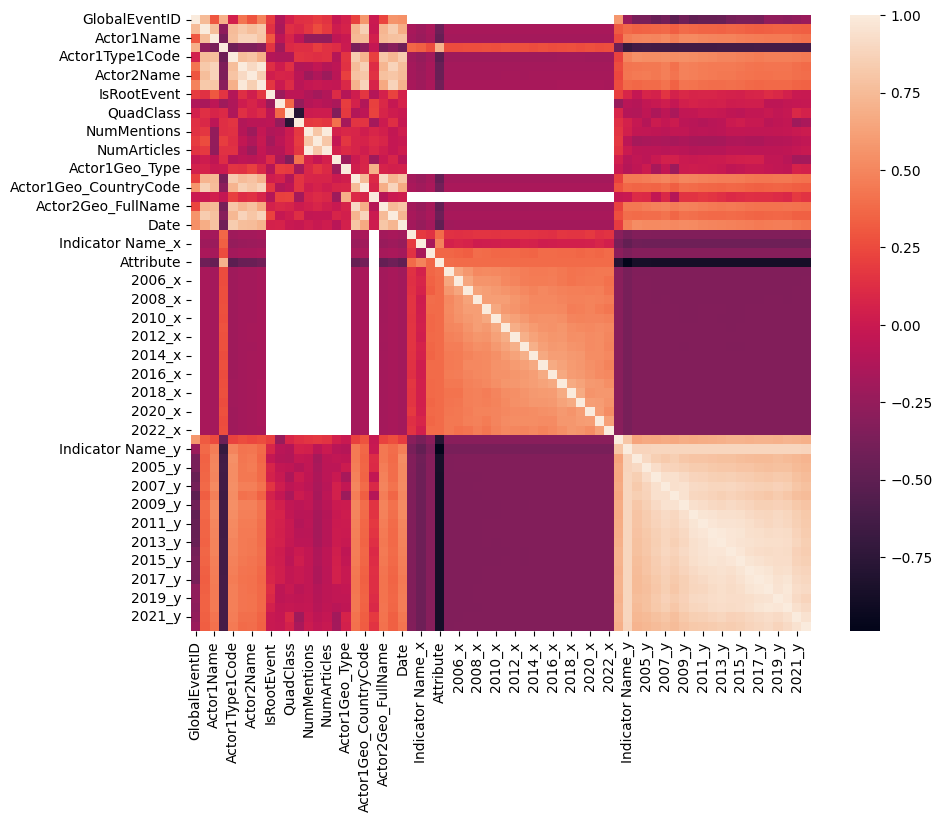

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(final_merged_df.corr())
plt.show()

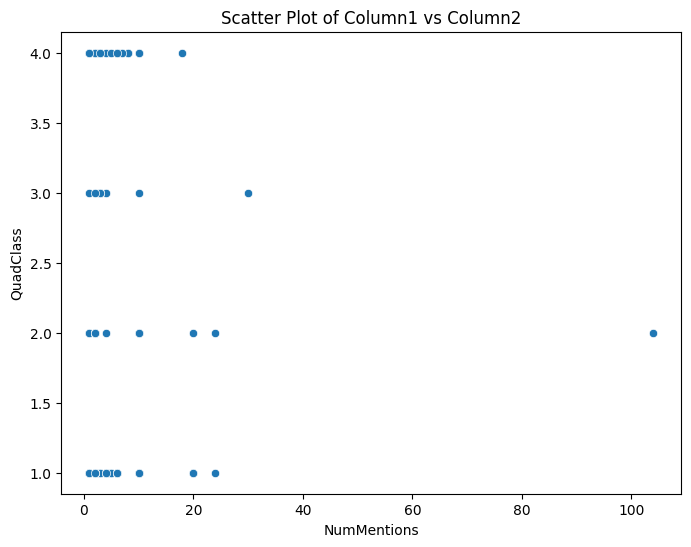

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NumMentions', y='QuadClass', data=final_merged_df)
plt.title('Scatter Plot of Column1 vs Column2')
plt.show()



In [63]:
correlation = final_merged_df['NumMentions'].corr(final_merged_df['QuadClass'])
print(f'Correlation between Column1 and Column2: {correlation}')


Correlation between Column1 and Column2: 0.010437599033386844
